In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data acquisition of the movielens dataset

In [2]:
f=open(r"C:\Users\Jyothis Yadu S\Untitled Folder\Projects\Project4_Movielens\users.dat",encoding='utf-8')
userlist=[]
for i in f:
    s=i.strip().split('::')
    userlist.append(s)
f.close()
df_user=pd.DataFrame(userlist,columns=['UserID','Gender','Age','Occupation','Zip-code'])

In [3]:
df_user

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
r=open(r"C:\Users\Jyothis Yadu S\Untitled Folder\Projects\Project4_Movielens\ratings.dat",encoding='utf-8')
ratinglist=[]
for i in r:
    s=i.strip().split('::')
    ratinglist.append(s)
r.close()
df_rating=pd.DataFrame(ratinglist,columns=['UserID','MovieID','Rating','Timestamp'])

In [5]:
df_rating

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
m=open(r"C:\Users\Jyothis Yadu S\Untitled Folder\Projects\Project4_Movielens\movies.dat",encoding='latin1')
movielist=[]
for i in m:
    s=i.strip().split('::')
    movielist.append(s)
m.close()
df_movie=pd.DataFrame(movielist,columns=['MovieID','Title','Genres'])

In [7]:
df_movie

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# EDA

In [8]:
#Missing Value 

In [9]:
df_user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [10]:
df_rating.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [11]:
df_movie.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [12]:
user_rating=pd.merge(df_user,df_rating,how='outer',on='UserID')

In [13]:
user_rating_movie=pd.merge(user_rating,df_movie,how='outer',on='MovieID')

In [15]:
#Visualize user age distribution

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


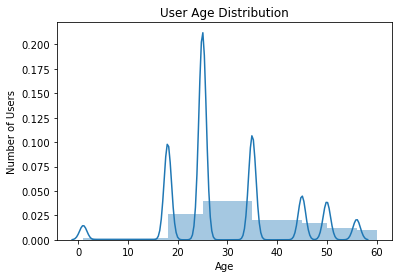

In [16]:
bin_list=[1,18,25,35,45,50,56,60]
sns.distplot(user_rating_movie['Age'],bins=bin_list)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('User Age Distribution')
plt.show()

In [17]:
#Visualize overall rating by users

<function matplotlib.pyplot.show(*args, **kw)>

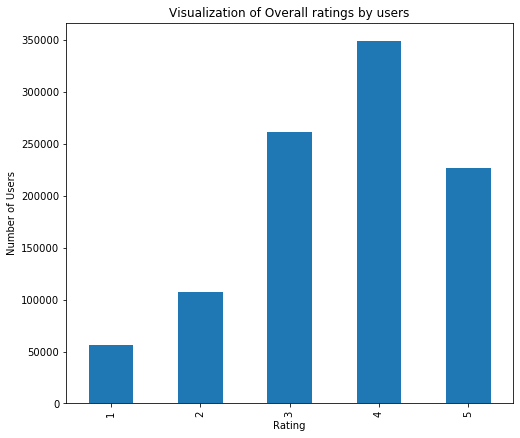

In [18]:
user_rating_movie.groupby('Rating')['UserID'].count().plot(kind = 'bar',figsize = (8,7))
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Visualization of Overall ratings by users')
plt.show

In [19]:
#Find and visualize the user rating of the movie “Toy Story”

<function matplotlib.pyplot.show(*args, **kw)>

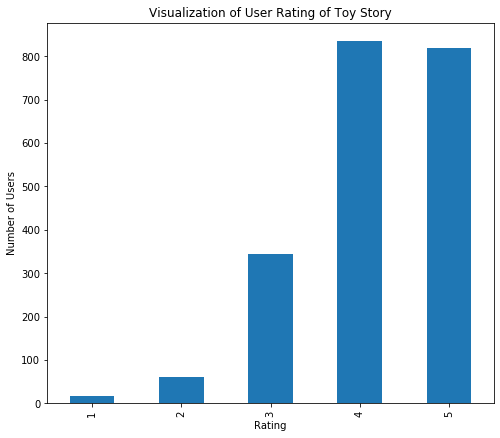

In [20]:
user_rating_movie[user_rating_movie.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count().plot(kind = 'bar',figsize = (8,7))
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Visualization of User Rating of Toy Story')
plt.show

In [21]:
#Find and visualize the viewership of the movie “Toy Story” by age group

<function matplotlib.pyplot.show(*args, **kw)>

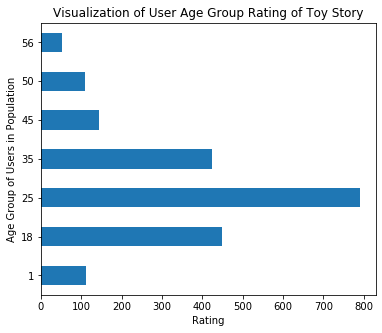

In [22]:
user_rating_movie[user_rating_movie.Title == 'Toy Story (1995)'].groupby('Age')['MovieID'].count().plot(kind = 'barh',figsize = (6,5))
plt.xlabel('Rating')
plt.ylabel('Age Group of Users in Population')
plt.title('Visualization of User Age Group Rating of Toy Story')
plt.show

In [23]:
#Find and visualize the top 25 movies by viewership rating

<function matplotlib.pyplot.show(*args, **kw)>

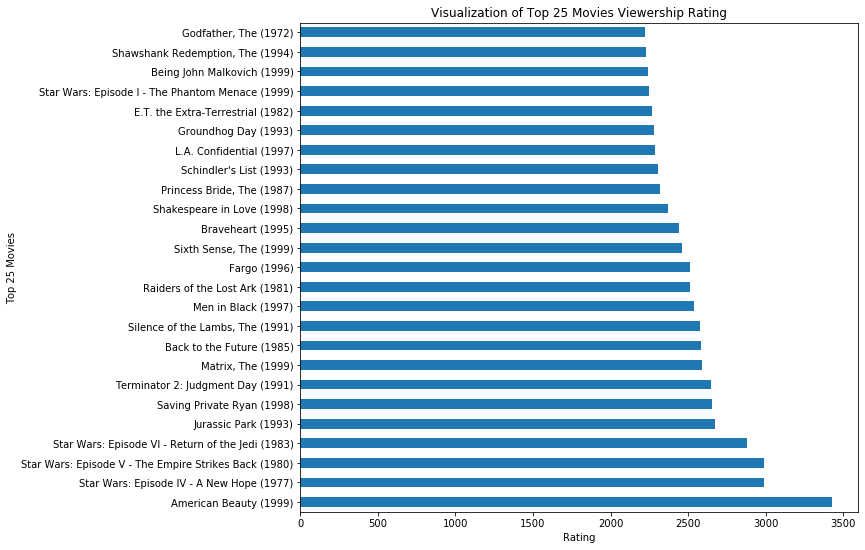

In [24]:
user_rating_movie.groupby('Title')['Rating'].count().sort_values(ascending = False)[:25].plot(kind ='barh',figsize = (10,9))
plt.xlabel('Rating')
plt.ylabel('Top 25 Movies')
plt.title('Visualization of Top 25 Movies Viewership Rating')
plt.show

In [25]:
#Find the rating for a particular user of user id = 2696

<function matplotlib.pyplot.show(*args, **kw)>

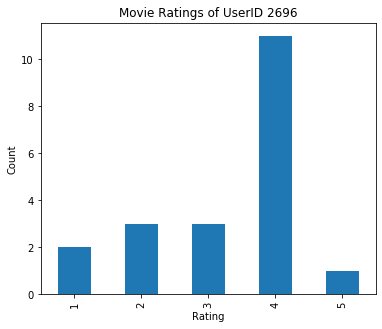

In [26]:
user_rating_movie[user_rating_movie.UserID == '2696'].groupby('Rating')['MovieID'].count().plot(kind = 'bar',figsize = (6,5))
plt.title('Movie Ratings of UserID 2696')
plt.ylabel("Count")
plt.xlabel("Rating")
plt.show

# Perform machine learning on first 500 extracted records

In [34]:
viewership=pd.merge(df_rating,df_user,on='UserID')

In [35]:
few_viewership=viewership.head(500)

In [37]:
few_viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [ ]:
#Feature for MovieID

In [39]:
le.fit(few_viewership['MovieID'])
x_movie= le.transform(few_viewership['MovieID'])
x_movie

array([ 31, 391, 408, 301, 194,  33,  57, 239, 383, 409, 384, 411, 201,
       250,   6, 236, 221, 159, 278, 237, 187, 393,  55, 373, 191, 363,
        19, 117,  88, 397, 184, 288,  91, 379, 138, 399, 133,   2, 234,
        78,   0, 151, 152, 222, 215,   3,   4,  36, 161, 374, 282, 387,
        46,  62, 269,  86, 388, 175, 389, 178, 218,  22, 249, 306,  37,
       129, 111,  38, 324, 245, 265,  40, 278, 357, 170, 279, 280, 266,
        49,  97, 251, 176, 270, 405, 335,  50, 283,  87,  59,  28, 292,
       293, 294,  20, 179, 208, 132, 307, 380, 113, 332, 241, 145, 414,
       134, 242,  41, 161, 371, 358, 185, 219,  71,  13, 338, 364,  74,
       164,  52,  63,  31, 131,  64, 193, 298, 204, 381,  32,  89, 396,
        34, 382, 195, 412, 225, 212, 141, 200, 342, 147,  95, 350, 148,
       149, 192,  23, 150, 101, 168, 106, 187,  15, 349, 209, 310, 359,
        18, 410, 360,  83, 303,  67, 305, 276, 398, 366, 230, 155, 152,
       127, 252, 156, 287,  36, 154, 334,  44, 322,  45,  46, 35

In [32]:
#Feature for Age

In [40]:
le.fit(few_viewership['Age'])
x_age= le.transform(few_viewership['Age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
#Feature for Occupation

In [42]:
le.fit(few_viewership['Occupation'])
x_Occupation= le.transform(few_viewership['Occupation'])
x_Occupation

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [43]:
#Feature Selection

In [44]:
few_viewership['New_MovieID']=x_movie
few_viewership['New_Age']=x_age
few_viewership['New_Occupation']=x_Occupation

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [48]:
#Use rating as label

In [45]:
x_input=few_viewership[['New_MovieID','New_Age','New_Occupation']]
y_input=few_viewership['Rating']

In [46]:
x_input.head()

,New_MovieID,New_Age,New_Occupation
0,31,0,0
1,391,0,0
2,408,0,0
3,301,0,0
4,194,0,0


In [47]:
y_input.head()

0    5
1    3
2    3
3    4
4    5
Name: Rating, dtype: object

# Create train and test data set 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(x_input,y_input,test_size=0.25,random_state=40)

In [52]:
lr= LogisticRegression()

In [53]:
lr.fit(X_train,Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
pred=lr.predict(X_test)

In [55]:
print('Accuracy',accuracy_score(Y_test,pred))

Accuracy 0.32


In [ ]:
#Create a histogram for movie, age, and occupation

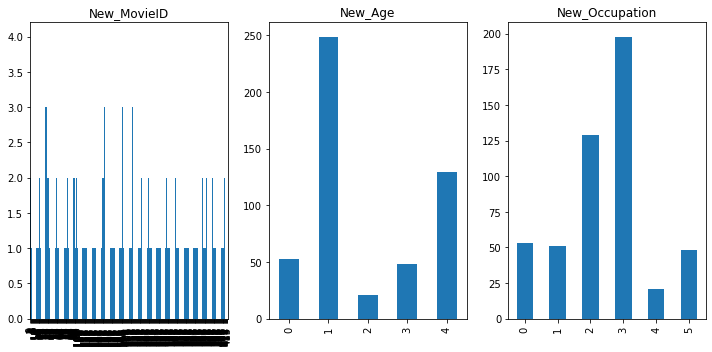

In [72]:
fig, axes=plt.subplots(ncols=len(x_input.columns), figsize=(10,5))
for col, ax in zip(x_input, axes):
    x_input[col].value_counts().sort_index().plot.bar(ax=ax,title=col)
plt.tight_layout()
plt.show()